In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
austa = sm.datasets.get_rdataset("austa", "fpp2").data

In [7]:
print(austa)

    time     value  index  residuals
0   1980  0.829894      0   0.252386
1   1981  0.859511      1   0.112636
2   1982  0.876689      2  -0.039552
3   1983  0.866707      3  -0.218901
4   1984  0.932052      4  -0.322923
5   1985  1.048264      5  -0.376078
6   1986  1.311193      6  -0.282516
7   1987  1.637562      7  -0.125514
8   1988  2.064107      8   0.131665
9   1989  1.912683      9  -0.189127
10  1990  2.035446     10  -0.235731
11  1991  2.177211     11  -0.263332
12  1992  2.389683     12  -0.220227
13  1993  2.750592     13  -0.028685
14  1994  3.090666     14   0.142023
15  1995  3.426640     15   0.308630
16  1996  3.830649     16   0.543272
17  1997  3.971909     17   0.515164
18  1998  3.831600     18   0.205489
19  1999  4.143101     19   0.347623
20  2000  4.566551     20   0.601706
21  2001  4.475410     21   0.341198
22  2002  4.462796     22   0.159218
23  2003  4.384829     23  -0.088116
24  2004  4.796861     24   0.154549
25  2005  5.015049     25   0.203370
2

In [3]:
austa['index'] = range(len(austa))

In [4]:
print(austa.head())

   time     value  index
0  1980  0.829894      0
1  1981  0.859511      1
2  1982  0.876689      2
3  1983  0.866707      3
4  1984  0.932052      4


In [5]:
model = smf.ols(formula='value ~ index', data=austa).fit() # DATAFRAME IS AUSTA
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           1.94e-28
Time:                        18:11:03   Log-Likelihood:                -6.4416
No. Observations:                  36   AIC:                             16.88
Df Residuals:                      34   BIC:                             20.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5775      0.097      5.940      0.0

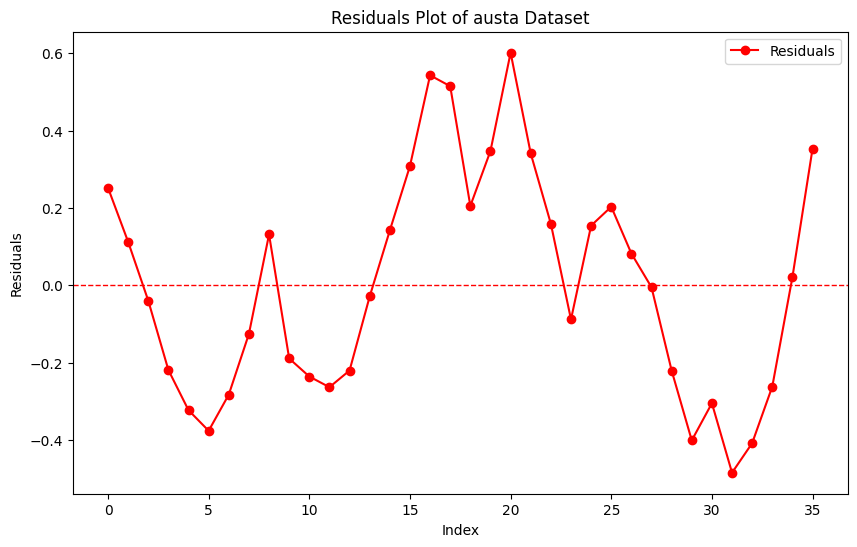

In [6]:
# Calculate residuals
austa['residuals'] = model.resid

# Residual Plot
plt.figure(figsize=(10, 6))
#plt.scatter(austa['index'], austa['residuals'], color='blue', label='Residuals')
plt.plot(austa['index'], austa['residuals'], marker='o', linestyle='-', color='red', label='Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Horizontal line at zero

plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot of austa Dataset')
plt.legend()
plt.show()


*   There seems to be a slight pattern or curve to the residuals, particularly in the middle section. This might suggest that the model isn't capturing all the non-linear relationships in the data.


*  No Obvious Funnel: The variance of the residuals doesn't seem to change drastically across the index, suggesting homoscedasticity might hold.

* No Extreme Outliers: There are no extremely large deviations from the zero line, indicating no clear outliers.
